# A1 - Pyschsignal Alpha Model 

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors import CustomFactor, SimpleMovingAverage
from quantopian.pipeline.filters import QTradableStocksUS
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.performance import mean_information_coefficient
from alphalens.tears import create_returns_tear_sheet
from alphalens.tears import create_information_tear_sheet

Signal Data

In [2]:
from quantopian.pipeline.data.psychsignal import aggregated_twitter_withretweets_stocktwits as psychsignal 

Creating a Pipeline with the "bull_minus_bear" column from the dataset, which represents the difference between the bull and bear combined sentiment score of stocks in our universe.  

In [3]:
def make_pipeline():
    dollar_volume = AverageDollarVolume(window_length=20)
    top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000
    universe = QTradableStocksUS() & top_1000_most_liquid
    return Pipeline(
         columns = {
        'bull_minus_bear': psychsignal.bull_minus_bear.latest
        },
        screen = universe
    )

Loading Factor Data for Stocks in our Universe

In [4]:
factor_data = run_pipeline(make_pipeline(), '2018-1-1', '2018-12-30')
factor_data

bull_minus_bear
2018-01-02 00:00:00+00:00 Equity(2 [ARNC])            -0.991333
                          Equity(24 [AAPL])            0.131318
                          Equity(62 [ABT])            -1.410000
                          Equity(64 [ABX])            -0.604000
                          Equity(67 [ADSK])           -1.498333
                          Equity(76 [TAP])             1.863333
                          Equity(114 [ADBE])          -0.475556
                          Equity(122 [ADI])           -0.630000
                          Equity(128 [ADM])           -0.991667
                          Equity(154 [AEM])            2.210000
                          Equity(161 [AEP])           -0.280000
                          Equity(166 [AES])            2.110000
                          Equity(185 [AFL])            0.802500
                          Equity(197 [AGCO])           2.330000
                          Equity(216 [HES])           -1.217500
                          Equity(239 [AIG])           -1.890000
                          Equity(266 [AJG])            1.810000
                          Equity(300 [ALK])            1.970000
                          Equity(301 [ALKS])          -2.353333
                          Equity(337 [AMAT])          -0.180000
                          Equity(351 [AMD])           -0.188134
                          Equity(353 [AME])            0.110000
                          Equity(368 [AMGN])          -0.505000
                          Equity(438 [AON])            1.240000
                          Equity(448 [APA])           -1.940000
                          Equity(455 [APC])           -0.755000
                          Equity(460 [APD])            1.500000
                          Equity(465 [APH])           -0.293333
                          Equity(612 [ATO])           -1.190000
                          Equity(630 [ADP])           -0.340000
...                                                         ...
2018-12-31 00:00:00+00:00 Equity(49608 [MTCH])         1.875000
                          Equity(49610 [SQ])           0.746889
                          Equity(49655 [TEAM])        -0.220000
                          Equity(50049 [FTV])         -2.220000
                          Equity(50077 [TWLO])         0.531111
                          Equity(50288 [TTD])          0.000000
                          Equity(50338 [NTNX])         1.046667
                          Equity(50350 [COUP])         1.950000
                          Equity(50428 [AA])          -0.026667
                          Equity(50430 [LW])           0.000000
                          Equity(50518 [ATH])          0.000000
                          Equity(50683 [SNAP])        -0.529021
                          Equity(50713 [GOOS])         0.274000
                          Equity(50716 [DXC])          0.000000
                          Equity(50758 [OKTA])         2.560000
                          Equity(50807 [CVNA])         0.395000
                          Equity(50860 [VST])         -2.390000
                          Equity(50970 [ATUS])        -2.153333
                          Equity(51012 [BHGE])        -0.450000
                          Equity(51157 [DWDP])        -0.450000
                          Equity(51231 [ROKU])         0.825333
                          Equity(51314 [MDB])          2.260000
                          Equity(51467 [SFIX])        -2.390000
                          Equity(51618 [NTR])          0.000000
                          Equity(51689 [PAGS])         0.000000
                          Equity(51734 [VICI])        -0.450000
                          Equity(51806 [CRON])         0.254444
                          Equity(51832 [ZS])           2.200000
                          Equity(51854 [DBX])         -0.697500
                          Equity(51895 [SPOT])        -1.500000

[179405 rows x 1 columns]

Loading Pipeline Model

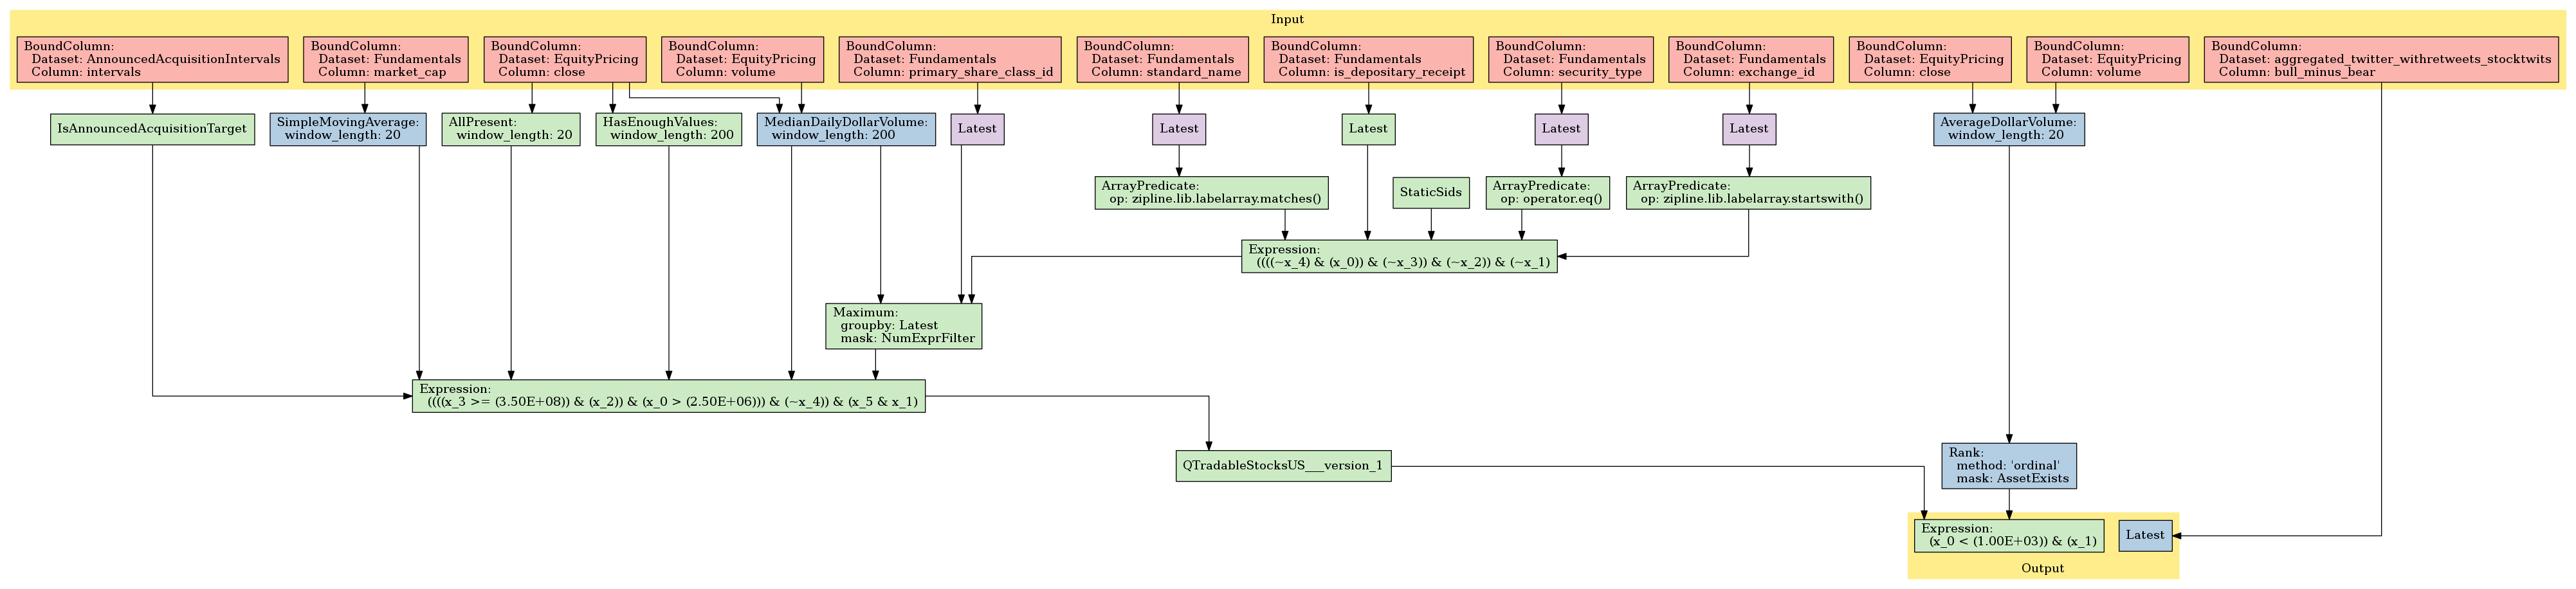

In [5]:
pipe = make_pipeline()
pipe.show_graph(format='png')

Determining Information Coefficent (IC) mean between 2015-1-1 and 2018-12-30

Dropped 4.2% entries from factor data: 4.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


,1D,5D,10D
IC Mean,0.002,-0.005,-0.004
IC Std.,0.049,0.048,0.044
Risk-Adjusted IC,0.033,-0.113,-0.098
t-stat(IC),0.512,-1.745,-1.511
p-value(IC),0.609,0.082,0.132
IC Skew,-0.363,-0.230,-0.239
IC Kurtosis,0.951,0.017,0.128


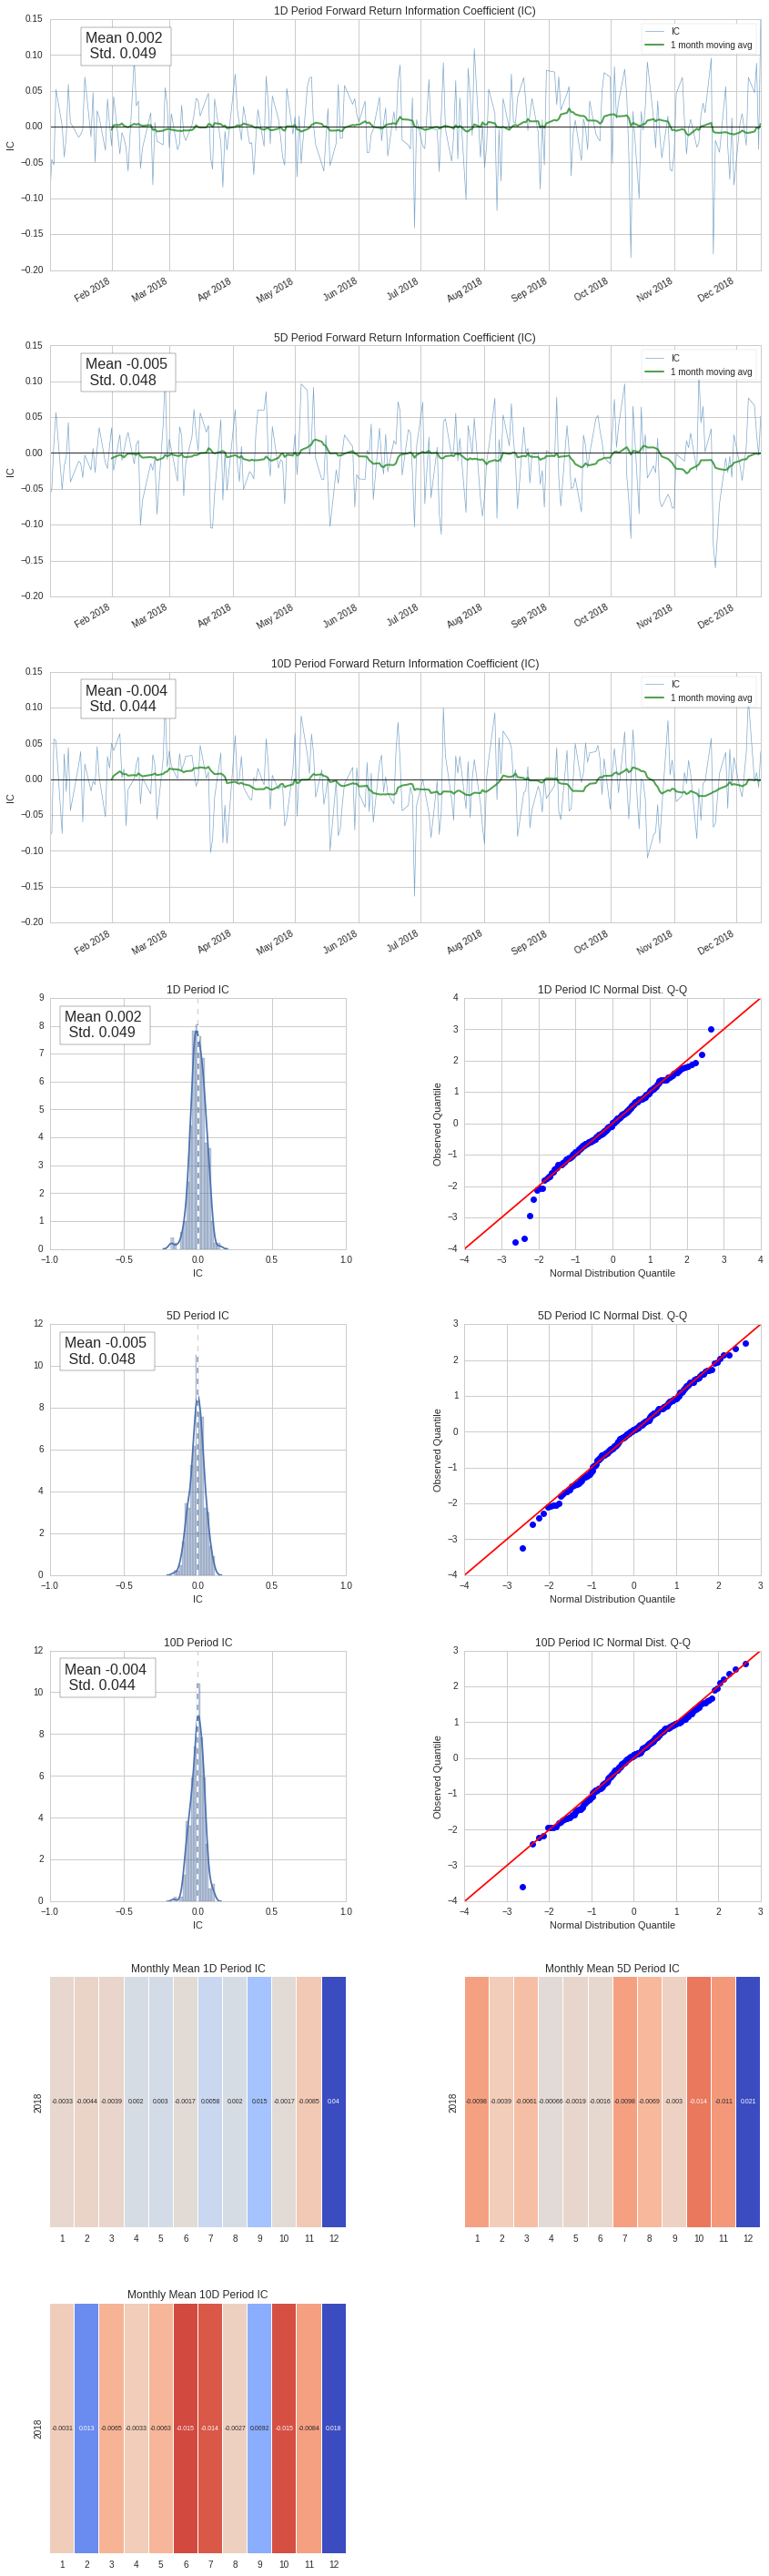

In [6]:
assets = factor_data.index.levels[1]
pricing_data = get_pricing(assets, '2015-1-1', '2018-12-30', fields='open_price')
merged_data = get_clean_factor_and_forward_returns(factor_data, pricing_data)
create_information_tear_sheet(merged_data)

Loading IC Decay Rate 

Dropped 18.4% entries from factor data: 18.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


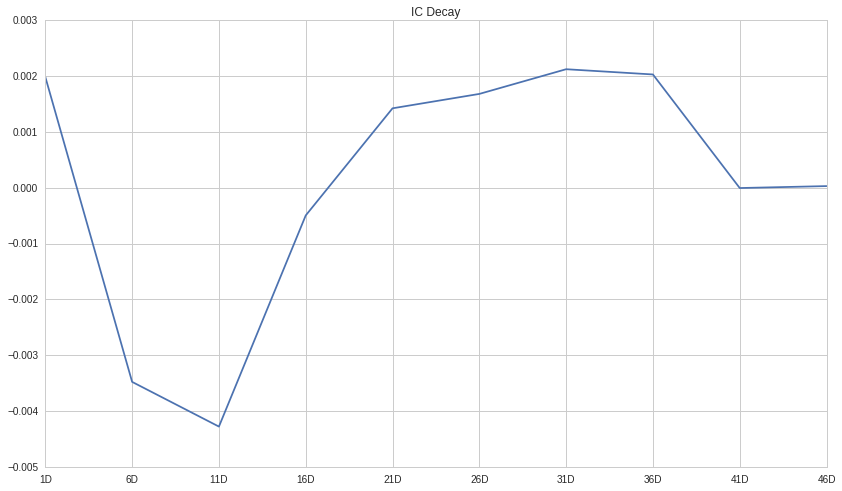

In [9]:
longest_look_forward_period = 50 # week = 5, month = 21, quarter = 63, year = 252
range_step = 5

merged_data_decay = get_clean_factor_and_forward_returns(
    factor = factor_data['bull_minus_bear'],
    prices = pricing_data,
    periods = range(1, longest_look_forward_period, range_step)
)

mean_information_coefficient(merged_data_decay).plot(title="IC Decay")